In [1]:
# for Google Colab only: Mount my Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
pwd

'/gdrive'

In [3]:
# for Google Colab only: Navigate to my snaug project folder
cd 'My Drive/Colab Notebooks/cavy_breed_clf'

/gdrive/My Drive/Colab Notebooks/cavy_breed_clf


In [8]:
# if running locally on laptop
!pwd

/home/ringoshin/Projects/dev/cavy_breed_clf/data


In [11]:
%cd '../'

/home/ringoshin/Projects/dev/cavy_breed_clf


In [13]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [14]:
def Save_Data(X, y, filename):
    """
    Saving dataset variants raw, training, test, validation)
    """
    df = pd.DataFrame({'image_path': X, 'breed': y})
    return df.to_csv(filename, index=False)

In [15]:
seed = 42
image_folders = ['American', 'Abyssinian', 'Silkie', 'Skinny']
image_path = 'images'
X, y = [], []

In [16]:
print(" > Creating datasets from images...")
for folder_name in image_folders:
    image_list_path = os.path.join(image_path, folder_name)
    for path, dirs, files in os.walk(image_list_path):
        for filename in files:
            X.append(os.path.join(path,filename))
            y.append(folder_name)

 > Creating datasets from images...


In [20]:
print(len(X), len(y))
print(X[:3])
print(y[:3])

1631 1631
['images/American/american_018.jpg', 'images/American/american_132.jpg', 'images/American/american_222.jpg']
['American', 'American', 'American']


In [21]:
# Split for the test dataset
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.2, 
                                                            shuffle=True, 
                                                            stratify= y, 
                                                            random_state=seed)

In [23]:
# Split for the training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, 
                                                  y_train_val, 
                                                  test_size=0.2, 
                                                  shuffle=True, 
                                                  stratify= y_train_val, 
                                                  random_state=seed)

In [29]:
print(len(X_train), len(y_train))
print(X_train[:3])
print(y_train[:3])

1043 1043
['images/American/american_2143.jpg', 'images/American/piggy_301.jpg', 'images/Abyssinian/abyssinian_1653.jpg']
['American', 'American', 'Abyssinian']


In [30]:
print(len(X_val), len(y_val))
print(X_val[:3])
print(y_val[:3])

261 261
['images/Silkie/silkie_692.jpg', 'images/Skinny/skinny_248.jpg', 'images/Abyssinian/abyssinian_1387.jpg']
['Silkie', 'Skinny', 'Abyssinian']


In [31]:
print(len(X_test), len(y_test))
print(X_test[:3])
print(y_test[:3])

327 327
['images/Skinny/skinny_294.jpg', 'images/Abyssinian/abyssinian_083.jpg', 'images/Abyssinian/abyssinian_1592.jpg']
['Skinny', 'Abyssinian', 'Abyssinian']


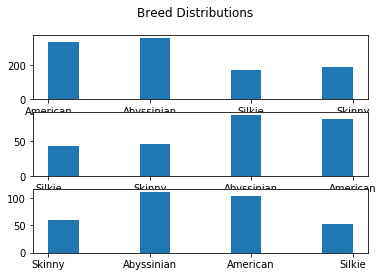

In [28]:
# check distributions
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)
fig.suptitle('Breed Distributions')
_ = axs[0].hist(y_train)
_ = axs[1].hist(y_val)
_ = axs[2].hist(y_test)
plt.show()

In [0]:
Save_Data(X, y, 'data/cavy_data_raw.csv')
Save_Data(X_train, y_train, 'data/cavy_data_train.csv')
Save_Data(X_val, y_val, 'data/cavy_data_val.csv')
Save_Data(X_test, y_test, 'data/cavy_data_test.csv')

print(" > done!")

 > done!
